In [65]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [66]:
data=pd.read_excel('random_forest_dataset.xlsx',skiprows=1)

In [67]:
data.describe()

,Sl No,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,109.000000,109.000000,117.000000,117.000000
mean,59.358974,78.820513,15.764103,78.773504,31.509402,82.923077,16.584615,13.091743,3.651376,32.182906,79.459829
std,34.320362,22.826790,4.565358,22.490563,8.996225,23.711322,4.742264,1.378010,1.468031,9.324146,22.680225
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,30.000000,78.000000,15.600000,78.000000,31.200000,83.000000,16.600000,12.000000,3.000000,31.800000,80.000000
50%,59.000000,84.000000,16.800000,84.000000,33.600000,90.000000,18.000000,13.000000,4.000000,35.400000,85.000000
75%,89.000000,91.000000,18.200000,90.000000,36.000000,94.000000,18.800000,14.000000,5.000000,36.800000,91.000000
max,118.000000,100.000000,20.000000,100.000000,40.000000,102.000000,20.400000,15.000000,5.000000,40.000000,100.000000


In [68]:
data.isna().sum()

Sl No     0
USN       0
Name      0
Title     1
P1        0
C1        0
P2        0
C2        0
P3        0
C3        0
R1        8
T1        8
P3T       0
Total     0
Grade     8
dtype: int64

In [69]:
data.head()

,Sl No,USN,Name,Title,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total,Grade
0,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85.0,34.0,93,18.6,13.0,4.0,35.6,85.2,A
1,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0,A
2,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84,16.8,82.0,32.8,88,17.6,13.0,1.0,31.6,81.2,A
3,4,1RV21MC004,AISHWARYA K KAMBLE,Analysis and Deployment of an efficient Deep L...,88,17.6,85.0,34.0,96,19.2,13.0,4.0,36.2,87.8,A
4,5,1RV21MC005,AISHWARYA NAGARAJ BABALESHWAR,Development of Deep Learning Model for Varied ...,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0,A


In [70]:
data['Title ']=data['Title '].fillna(data['Title '].mode()[0])

In [71]:
data['R1']=data['R1'].fillna(data['R1'].mean())

In [72]:
data['T1']=data['T1'].fillna(data['T1'].mean())

In [73]:
data['Grade']=data['Grade'].fillna('F')

In [74]:
data.isna().sum()

Sl No     0
USN       0
Name      0
Title     0
P1        0
C1        0
P2        0
C2        0
P3        0
C3        0
R1        0
T1        0
P3T       0
Total     0
Grade     0
dtype: int64

In [75]:
X=data.drop(['Sl No ','USN ','Name ','Title ','Grade'],axis=1)

In [76]:
y=data['Grade']

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [78]:
rfc=RandomForestClassifier(n_estimators=10,random_state=42)

In [79]:
rfc=rfc.fit(X_train,y_train)

In [80]:
y_pred=rfc.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred)

0.9166666666666666

<Axes: >

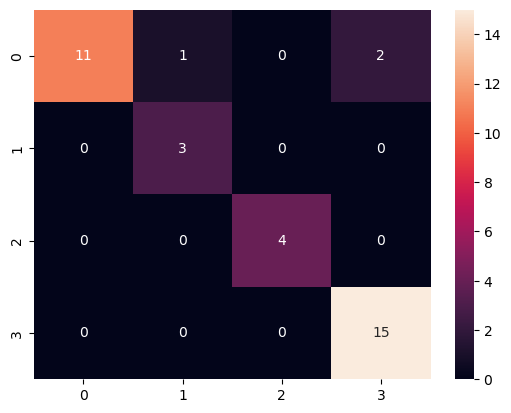

In [82]:
cm=confusion_matrix(y_test,y_pred)
sb.heatmap(cm,annot=True)

In [83]:
result=rfc.predict([[0,0,0,0,0,0,0,0,0,0]])
print(result)

['F']


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [84]:
result=rfc.predict([[79,15.8,79.0,31.6,86,17.2,13,3,33.2,80.6]])
print(result)

['A']


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
